In [24]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df = pd.read_csv("data/div.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2013-03-15,19.036,19.075,18.974,19.075,72565,0
1,2013-03-18,19.004,19.036,18.958,18.974,112389,0
2,2013-03-19,19.004,19.004,18.863,18.942,78426,0
3,2013-03-20,19.004,19.069,18.990,19.060,95275,0
4,2013-03-21,19.060,19.108,19.056,19.060,49390,0


In [25]:
print(df.head())
print(df.shape)
print(df.columns)

         Date    Open    High     Low   Close  Volume  OpenInt
0  2013-03-15  19.036  19.075  18.974  19.075   72565        0
1  2013-03-18  19.004  19.036  18.958  18.974  112389        0
2  2013-03-19  19.004  19.004  18.863  18.942   78426        0
3  2013-03-20  19.004  19.069  18.990  19.060   95275        0
4  2013-03-21  19.060  19.108  19.056  19.060   49390        0
(1176, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


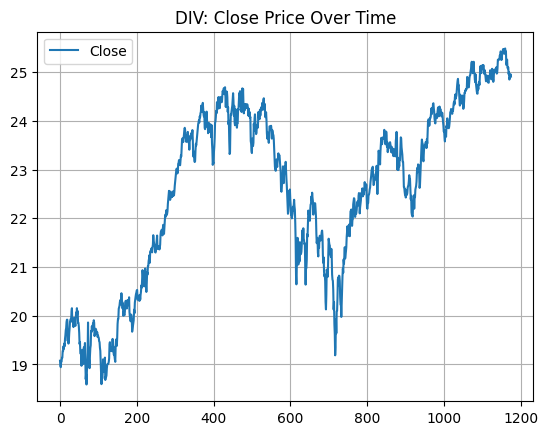

In [26]:
df[['Close']].plot()
plt.title("DIV: Close Price Over Time")
plt.grid(True)
plt.show()

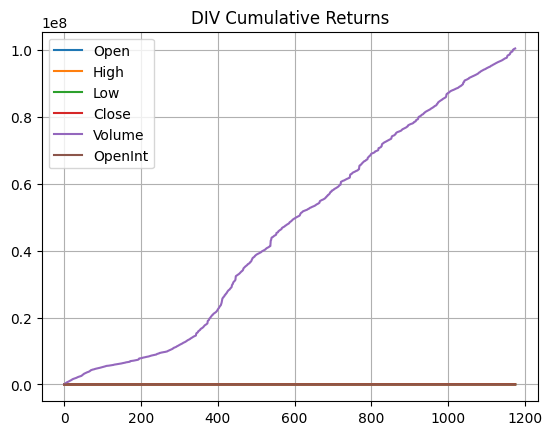

In [27]:
dr = df.cumsum()
dr.plot()
plt.title('DIV Cumulative Returns')
plt.grid(True)

Text(0.5, 1.0, 'DIV Autocorrelation plot')

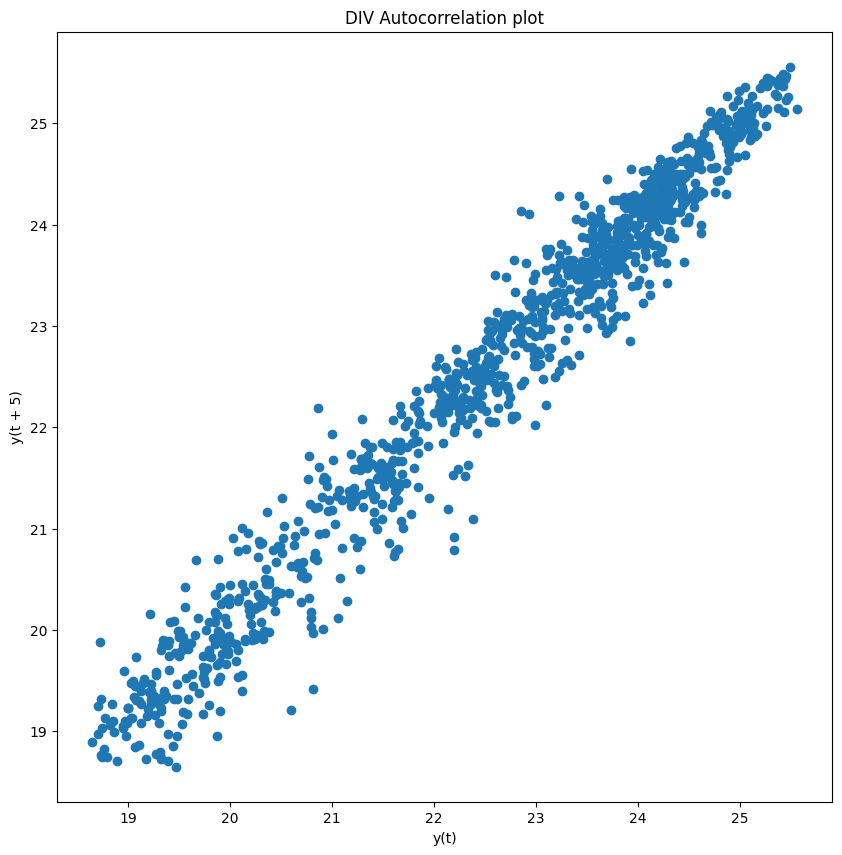

In [28]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('DIV Autocorrelation plot')

In [29]:
print(df['Date'][5])

2013-03-22


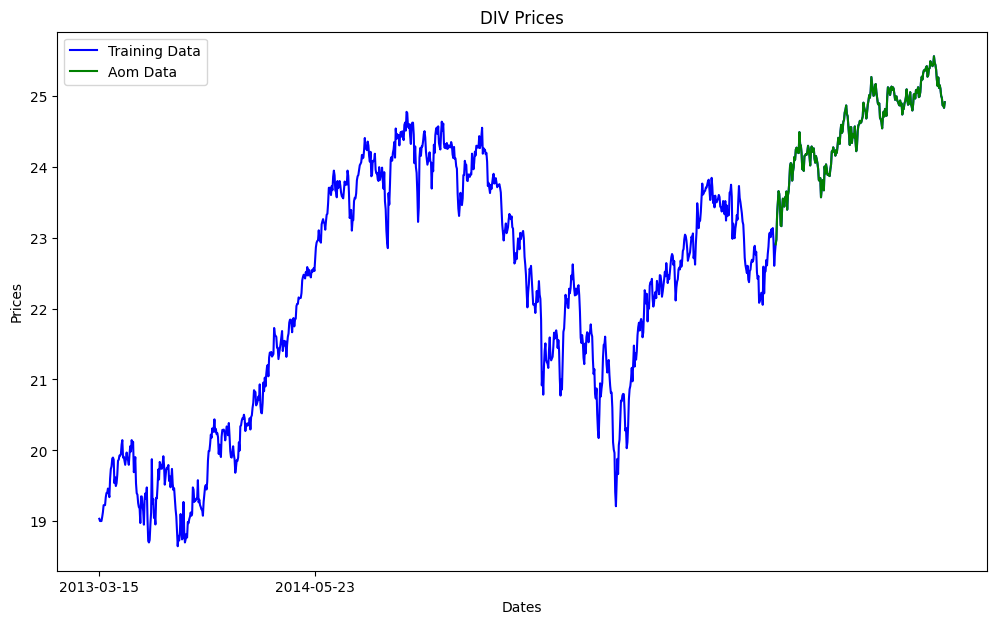

In [30]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('DIV Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Aom Data')
plt.xticks(np.arange(0,400, 300), df['Date'][0:400:300])
plt.legend()

In [31]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [32]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.012
Symmetric mean absolute percentage error: 0.353


/tmp/ipykernel_6396/2972664078.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


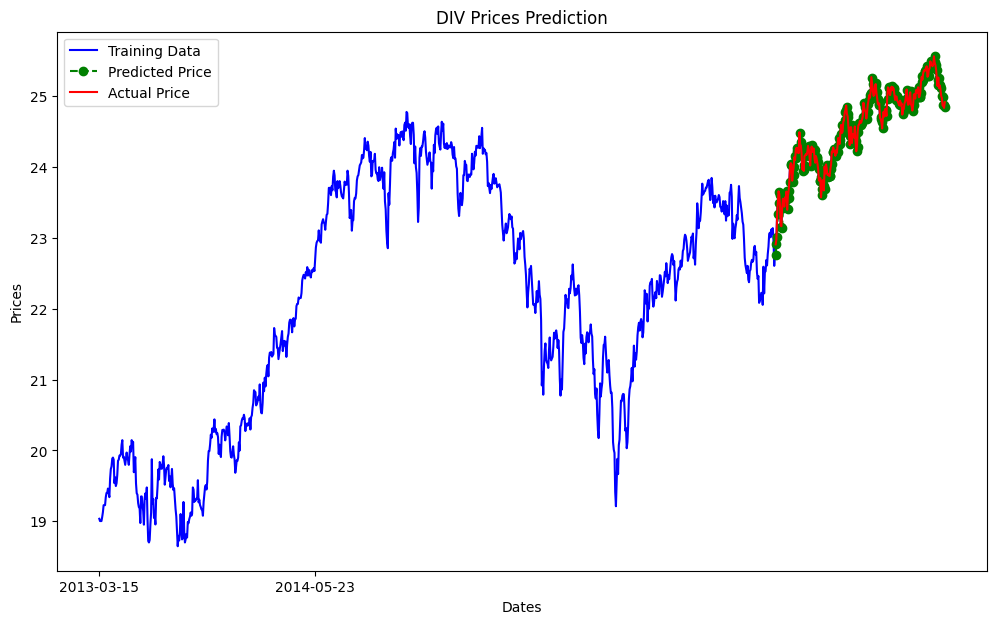

In [35]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('DIV Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,400, 300), df['Date'][0:400:300])
plt.legend()

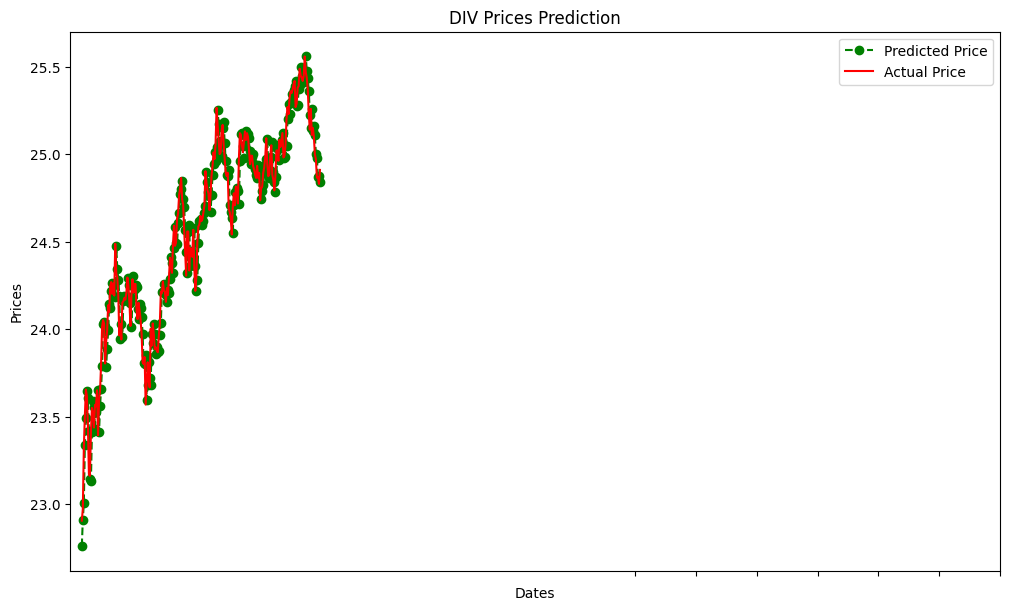

In [36]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('DIV Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()